In [1]:
import math
from functools import cache, partial
from itertools import combinations, chain

import sympy
from sympy import symbols, sqrt, diff, Symbol, latex, cos, sin, acos, simplify, pi
from sympy.functions.special.spherical_harmonics import Ynm, Znm
from sympy.functions.elementary.complexes import sign
from sympy.simplify.radsimp import collect_const, collect_sqrt
from e3nn.o3._spherical_harmonics import _spherical_harmonics
import torch

x, y, z = symbols("x y z", real=True)

# express in terms of spherical coordinates
r = symbols("r", nonnegative=True)
phi, theta = symbols("phi theta")

# conversion mapping
sph_to_cart = {
    "theta": acos(z / sqrt(x**2. + y**2. + z**2)),
    "phi": sign(y) * acos(x / sqrt(x**2 + y**2.)),
    "r": sqrt(x**2. + y**2 + z**2)
}

In [2]:
def derive_sph_harm(n: int, real_only: bool = True):
    # define symbols and conversions
    x, y, z = symbols("x y z", real=real_only)
    theta, phi = symbols("theta phi")
    sph_to_cart = {
        "theta": acos(z / sqrt(x**2. + y**2. + z**2)),
        "phi": sign(y) * acos(x / sqrt(x**2 + y**2.)),
    }
    num_projections = 2 * n + 1
    terms = {}
    for m in range(-n, n + 1):
        sph_harm = Ynm(n, m, theta, phi).subs(sph_to_cart).expand(func=True).cancel().simplify()
        terms[f"{n},{m}"] = sph_harm
    return terms


def numerical_evaluation(expr, _x: float = 1., _y: float = 1., _z: float = 1.):
    return expr.evalf().subs({"x": _x, "y": _y, "z": _z})

In [3]:
derive_sph_harm(2, real_only=True)["2,0"]

sqrt(5)*(-x**2.0 - y**2.0 + 2*z**2)/(4*sqrt(pi)*(x**2.0 + y**2.0 + z**2))

In [4]:
test_tensor = torch.tensor([[1., 1., 1.]])

In [5]:
_spherical_harmonics(2, test_tensor[:,0], test_tensor[:,1], test_tensor[:,2])

tensor([[1.0000, 1.7321, 1.7321, 1.7321, 3.8730, 3.8730, 0.0000, 3.8730, 0.0000]])

## From `e3nn` equations

The cell below is incredibly long, as they were directly copied from `e3nn`.

In [6]:
x, y, z = symbols("x y z")

y_2_0 = math.sqrt(15) * x * z
y_2_1 = math.sqrt(15) * x * y
y2 = y**2.
x2z2 = x**2. + z**2.
y_2_2 = math.sqrt(5) * (y2 - (1 / 2) * x2z2)
y_2_3 = math.sqrt(15) * y * z
y_2_4 = (1 / 2) * math.sqrt(15) * (z**2. - x**2.)

y_3_0 = (1 / 6) * math.sqrt(42) * (y_2_0 * z + y_2_4 * x)
y_3_1 = math.sqrt(7) * y_2_0 * y
y_3_2 = (1 / 8) * math.sqrt(168) * (4.0 * y2 - x2z2) * x
y_3_3 = (1 / 2) * math.sqrt(7) * y * (2.0 * y2 - 3.0 * x2z2)
y_3_4 = (1 / 8) * math.sqrt(168) * z * (4.0 * y2 - x2z2)
y_3_5 = math.sqrt(7) * y_2_4 * y
y_3_6 = (1 / 6) * math.sqrt(42) * (y_2_4 * z - y_2_0 * x)

y_4_0 = (3 / 4) * math.sqrt(2) * (y_3_0 * z + y_3_6 * x)
y_4_1 = (3 / 4) * y_3_0 * y + (3 / 8) * math.sqrt(6) * y_3_1 * z + (3 / 8) * math.sqrt(6) * y_3_5 * x
y_4_2 = (
    -3 / 56 * math.sqrt(14) * y_3_0 * z
    + (3 / 14) * math.sqrt(21) * y_3_1 * y
    + (3 / 56) * math.sqrt(210) * y_3_2 * z
    + (3 / 56) * math.sqrt(210) * y_3_4 * x
    + (3 / 56) * math.sqrt(14) * y_3_6 * x
)
y_4_3 = (
    -3 / 56 * math.sqrt(42) * y_3_1 * z
    + (3 / 28) * math.sqrt(105) * y_3_2 * y
    + (3 / 28) * math.sqrt(70) * y_3_3 * x
    + (3 / 56) * math.sqrt(42) * y_3_5 * x
)
y_4_4 = -3 / 28 * math.sqrt(42) * y_3_2 * x + (3 / 7) * math.sqrt(7) * y_3_3 * y - 3 / 28 * math.sqrt(42) * y_3_4 * z
y_4_5 = (
    -3 / 56 * math.sqrt(42) * y_3_1 * x
    + (3 / 28) * math.sqrt(70) * y_3_3 * z
    + (3 / 28) * math.sqrt(105) * y_3_4 * y
    - 3 / 56 * math.sqrt(42) * y_3_5 * z
)
y_4_6 = (
    -3 / 56 * math.sqrt(14) * y_3_0 * x
    - 3 / 56 * math.sqrt(210) * y_3_2 * x
    + (3 / 56) * math.sqrt(210) * y_3_4 * z
    + (3 / 14) * math.sqrt(21) * y_3_5 * y
    - 3 / 56 * math.sqrt(14) * y_3_6 * z
)
y_4_7 = -3 / 8 * math.sqrt(6) * y_3_1 * x + (3 / 8) * math.sqrt(6) * y_3_5 * z + (3 / 4) * y_3_6 * y
y_4_8 = (3 / 4) * math.sqrt(2) * (-y_3_0 * x + y_3_6 * z)

y_5_0 = (1 / 10) * math.sqrt(110) * (y_4_0 * z + y_4_8 * x)
y_5_1 = (1 / 5) * math.sqrt(11) * y_4_0 * y + (1 / 5) * math.sqrt(22) * y_4_1 * z + (1 / 5) * math.sqrt(22) * y_4_7 * x
y_5_2 = (
    -1 / 30 * math.sqrt(22) * y_4_0 * z
    + (4 / 15) * math.sqrt(11) * y_4_1 * y
    + (1 / 15) * math.sqrt(154) * y_4_2 * z
    + (1 / 15) * math.sqrt(154) * y_4_6 * x
    + (1 / 30) * math.sqrt(22) * y_4_8 * x
)
y_5_3 = (
    -1 / 30 * math.sqrt(66) * y_4_1 * z
    + (1 / 15) * math.sqrt(231) * y_4_2 * y
    + (1 / 30) * math.sqrt(462) * y_4_3 * z
    + (1 / 30) * math.sqrt(462) * y_4_5 * x
    + (1 / 30) * math.sqrt(66) * y_4_7 * x
)
y_5_4 = (
    -1 / 15 * math.sqrt(33) * y_4_2 * z
    + (2 / 15) * math.sqrt(66) * y_4_3 * y
    + (1 / 15) * math.sqrt(165) * y_4_4 * x
    + (1 / 15) * math.sqrt(33) * y_4_6 * x
)
y_5_5 = (
    -1 / 15 * math.sqrt(110) * y_4_3 * x + (1 / 3) * math.sqrt(11) * y_4_4 * y - 1 / 15 * math.sqrt(110) * y_4_5 * z
)
y_5_6 = (
    -1 / 15 * math.sqrt(33) * y_4_2 * x
    + (1 / 15) * math.sqrt(165) * y_4_4 * z
    + (2 / 15) * math.sqrt(66) * y_4_5 * y
    - 1 / 15 * math.sqrt(33) * y_4_6 * z
)
y_5_7 = (
    -1 / 30 * math.sqrt(66) * y_4_1 * x
    - 1 / 30 * math.sqrt(462) * y_4_3 * x
    + (1 / 30) * math.sqrt(462) * y_4_5 * z
    + (1 / 15) * math.sqrt(231) * y_4_6 * y
    - 1 / 30 * math.sqrt(66) * y_4_7 * z
)
y_5_8 = (
    -1 / 30 * math.sqrt(22) * y_4_0 * x
    - 1 / 15 * math.sqrt(154) * y_4_2 * x
    + (1 / 15) * math.sqrt(154) * y_4_6 * z
    + (4 / 15) * math.sqrt(11) * y_4_7 * y
    - 1 / 30 * math.sqrt(22) * y_4_8 * z
)
y_5_9 = -1 / 5 * math.sqrt(22) * y_4_1 * x + (1 / 5) * math.sqrt(22) * y_4_7 * z + (1 / 5) * math.sqrt(11) * y_4_8 * y
y_5_10 = (1 / 10) * math.sqrt(110) * (-y_4_0 * x + y_4_8 * z)

y_6_0 = (1 / 6) * math.sqrt(39) * (y_5_0 * z + y_5_10 * x)
y_6_1 = (
    (1 / 6) * math.sqrt(13) * y_5_0 * y + (1 / 12) * math.sqrt(130) * y_5_1 * z + (1 / 12) * math.sqrt(130) * y_5_9 * x
)
y_6_2 = (
    -1 / 132 * math.sqrt(286) * y_5_0 * z
    + (1 / 33) * math.sqrt(715) * y_5_1 * y
    + (1 / 132) * math.sqrt(286) * y_5_10 * x
    + (1 / 44) * math.sqrt(1430) * y_5_2 * z
    + (1 / 44) * math.sqrt(1430) * y_5_8 * x
)
y_6_3 = (
    -1 / 132 * math.sqrt(858) * y_5_1 * z
    + (1 / 22) * math.sqrt(429) * y_5_2 * y
    + (1 / 22) * math.sqrt(286) * y_5_3 * z
    + (1 / 22) * math.sqrt(286) * y_5_7 * x
    + (1 / 132) * math.sqrt(858) * y_5_9 * x
)
y_6_4 = (
    -1 / 66 * math.sqrt(429) * y_5_2 * z
    + (2 / 33) * math.sqrt(286) * y_5_3 * y
    + (1 / 66) * math.sqrt(2002) * y_5_4 * z
    + (1 / 66) * math.sqrt(2002) * y_5_6 * x
    + (1 / 66) * math.sqrt(429) * y_5_8 * x
)
y_6_5 = (
    -1 / 66 * math.sqrt(715) * y_5_3 * z
    + (1 / 66) * math.sqrt(5005) * y_5_4 * y
    + (1 / 66) * math.sqrt(3003) * y_5_5 * x
    + (1 / 66) * math.sqrt(715) * y_5_7 * x
)
y_6_6 = (
    -1 / 66 * math.sqrt(2145) * y_5_4 * x + (1 / 11) * math.sqrt(143) * y_5_5 * y - 1 / 66 * math.sqrt(2145) * y_5_6 * z
)
y_6_7 = (
    -1 / 66 * math.sqrt(715) * y_5_3 * x
    + (1 / 66) * math.sqrt(3003) * y_5_5 * z
    + (1 / 66) * math.sqrt(5005) * y_5_6 * y
    - 1 / 66 * math.sqrt(715) * y_5_7 * z
)
y_6_8 = (
    -1 / 66 * math.sqrt(429) * y_5_2 * x
    - 1 / 66 * math.sqrt(2002) * y_5_4 * x
    + (1 / 66) * math.sqrt(2002) * y_5_6 * z
    + (2 / 33) * math.sqrt(286) * y_5_7 * y
    - 1 / 66 * math.sqrt(429) * y_5_8 * z
)
y_6_9 = (
    -1 / 132 * math.sqrt(858) * y_5_1 * x
    - 1 / 22 * math.sqrt(286) * y_5_3 * x
    + (1 / 22) * math.sqrt(286) * y_5_7 * z
    + (1 / 22) * math.sqrt(429) * y_5_8 * y
    - 1 / 132 * math.sqrt(858) * y_5_9 * z
)
y_6_10 = (
    -1 / 132 * math.sqrt(286) * y_5_0 * x
    - 1 / 132 * math.sqrt(286) * y_5_10 * z
    - 1 / 44 * math.sqrt(1430) * y_5_2 * x
    + (1 / 44) * math.sqrt(1430) * y_5_8 * z
    + (1 / 33) * math.sqrt(715) * y_5_9 * y
)
y_6_11 = (
    -1 / 12 * math.sqrt(130) * y_5_1 * x + (1 / 6) * math.sqrt(13) * y_5_10 * y + (1 / 12) * math.sqrt(130) * y_5_9 * z
)
y_6_12 = (1 / 6) * math.sqrt(39) * (-y_5_0 * x + y_5_10 * z)

y_7_0 = (1 / 14) * math.sqrt(210) * (y_6_0 * z + y_6_12 * x)
y_7_1 = (1 / 7) * math.sqrt(15) * y_6_0 * y + (3 / 7) * math.sqrt(5) * y_6_1 * z + (3 / 7) * math.sqrt(5) * y_6_11 * x
y_7_2 = (
    -1 / 182 * math.sqrt(390) * y_6_0 * z
    + (6 / 91) * math.sqrt(130) * y_6_1 * y
    + (3 / 91) * math.sqrt(715) * y_6_10 * x
    + (1 / 182) * math.sqrt(390) * y_6_12 * x
    + (3 / 91) * math.sqrt(715) * y_6_2 * z
)
y_7_3 = (
    -3 / 182 * math.sqrt(130) * y_6_1 * z
    + (3 / 182) * math.sqrt(130) * y_6_11 * x
    + (3 / 91) * math.sqrt(715) * y_6_2 * y
    + (5 / 182) * math.sqrt(858) * y_6_3 * z
    + (5 / 182) * math.sqrt(858) * y_6_9 * x
)
y_7_4 = (
    (3 / 91) * math.sqrt(65) * y_6_10 * x
    - 3 / 91 * math.sqrt(65) * y_6_2 * z
    + (10 / 91) * math.sqrt(78) * y_6_3 * y
    + (15 / 182) * math.sqrt(78) * y_6_4 * z
    + (15 / 182) * math.sqrt(78) * y_6_8 * x
)
y_7_5 = (
    -5 / 91 * math.sqrt(39) * y_6_3 * z
    + (15 / 91) * math.sqrt(39) * y_6_4 * y
    + (3 / 91) * math.sqrt(390) * y_6_5 * z
    + (3 / 91) * math.sqrt(390) * y_6_7 * x
    + (5 / 91) * math.sqrt(39) * y_6_9 * x
)
y_7_6 = (
    -15 / 182 * math.sqrt(26) * y_6_4 * z
    + (12 / 91) * math.sqrt(65) * y_6_5 * y
    + (2 / 91) * math.sqrt(1365) * y_6_6 * x
    + (15 / 182) * math.sqrt(26) * y_6_8 * x
)
y_7_7 = (
    -3 / 91 * math.sqrt(455) * y_6_5 * x + (1 / 13) * math.sqrt(195) * y_6_6 * y - 3 / 91 * math.sqrt(455) * y_6_7 * z
)
y_7_8 = (
    -15 / 182 * math.sqrt(26) * y_6_4 * x
    + (2 / 91) * math.sqrt(1365) * y_6_6 * z
    + (12 / 91) * math.sqrt(65) * y_6_7 * y
    - 15 / 182 * math.sqrt(26) * y_6_8 * z
)
y_7_9 = (
    -5 / 91 * math.sqrt(39) * y_6_3 * x
    - 3 / 91 * math.sqrt(390) * y_6_5 * x
    + (3 / 91) * math.sqrt(390) * y_6_7 * z
    + (15 / 91) * math.sqrt(39) * y_6_8 * y
    - 5 / 91 * math.sqrt(39) * y_6_9 * z
)
y_7_10 = (
    -3 / 91 * math.sqrt(65) * y_6_10 * z
    - 3 / 91 * math.sqrt(65) * y_6_2 * x
    - 15 / 182 * math.sqrt(78) * y_6_4 * x
    + (15 / 182) * math.sqrt(78) * y_6_8 * z
    + (10 / 91) * math.sqrt(78) * y_6_9 * y
)
y_7_11 = (
    -3 / 182 * math.sqrt(130) * y_6_1 * x
    + (3 / 91) * math.sqrt(715) * y_6_10 * y
    - 3 / 182 * math.sqrt(130) * y_6_11 * z
    - 5 / 182 * math.sqrt(858) * y_6_3 * x
    + (5 / 182) * math.sqrt(858) * y_6_9 * z
)
y_7_12 = (
    -1 / 182 * math.sqrt(390) * y_6_0 * x
    + (3 / 91) * math.sqrt(715) * y_6_10 * z
    + (6 / 91) * math.sqrt(130) * y_6_11 * y
    - 1 / 182 * math.sqrt(390) * y_6_12 * z
    - 3 / 91 * math.sqrt(715) * y_6_2 * x
)
y_7_13 = -3 / 7 * math.sqrt(5) * y_6_1 * x + (3 / 7) * math.sqrt(5) * y_6_11 * z + (1 / 7) * math.sqrt(15) * y_6_12 * y
y_7_14 = (1 / 14) * math.sqrt(210) * (-y_6_0 * x + y_6_12 * z)

y_8_0 = (1 / 4) * math.sqrt(17) * (y_7_0 * z + y_7_14 * x)
y_8_1 = (
    (1 / 8) * math.sqrt(17) * y_7_0 * y + (1 / 16) * math.sqrt(238) * y_7_1 * z + (1 / 16) * math.sqrt(238) * y_7_13 * x
)
y_8_2 = (
    -1 / 240 * math.sqrt(510) * y_7_0 * z
    + (1 / 60) * math.sqrt(1785) * y_7_1 * y
    + (1 / 240) * math.sqrt(46410) * y_7_12 * x
    + (1 / 240) * math.sqrt(510) * y_7_14 * x
    + (1 / 240) * math.sqrt(46410) * y_7_2 * z
)
y_8_3 = (
    (1 / 80)
    * math.sqrt(2)
    * (
        -math.sqrt(85) * y_7_1 * z
        + math.sqrt(2210) * y_7_11 * x
        + math.sqrt(85) * y_7_13 * x
        + math.sqrt(2210) * y_7_2 * y
        + math.sqrt(2210) * y_7_3 * z
    )
)
y_8_4 = (
    (1 / 40) * math.sqrt(935) * y_7_10 * x
    + (1 / 40) * math.sqrt(85) * y_7_12 * x
    - 1 / 40 * math.sqrt(85) * y_7_2 * z
    + (1 / 10) * math.sqrt(85) * y_7_3 * y
    + (1 / 40) * math.sqrt(935) * y_7_4 * z
)
y_8_5 = (
    (1 / 48)
    * math.sqrt(2)
    * (
        math.sqrt(102) * y_7_11 * x
        - math.sqrt(102) * y_7_3 * z
        + math.sqrt(1122) * y_7_4 * y
        + math.sqrt(561) * y_7_5 * z
        + math.sqrt(561) * y_7_9 * x
    )
)
y_8_6 = (
    (1 / 16) * math.sqrt(34) * y_7_10 * x
    - 1 / 16 * math.sqrt(34) * y_7_4 * z
    + (1 / 4) * math.sqrt(17) * y_7_5 * y
    + (1 / 16) * math.sqrt(102) * y_7_6 * z
    + (1 / 16) * math.sqrt(102) * y_7_8 * x
)
y_8_7 = (
    -1 / 80 * math.sqrt(1190) * y_7_5 * z
    + (1 / 40) * math.sqrt(1785) * y_7_6 * y
    + (1 / 20) * math.sqrt(255) * y_7_7 * x
    + (1 / 80) * math.sqrt(1190) * y_7_9 * x
)
y_8_8 = (
    -1 / 60 * math.sqrt(1785) * y_7_6 * x + (1 / 15) * math.sqrt(255) * y_7_7 * y - 1 / 60 * math.sqrt(1785) * y_7_8 * z
)
y_8_9 = (
    -1 / 80 * math.sqrt(1190) * y_7_5 * x
    + (1 / 20) * math.sqrt(255) * y_7_7 * z
    + (1 / 40) * math.sqrt(1785) * y_7_8 * y
    - 1 / 80 * math.sqrt(1190) * y_7_9 * z
)
y_8_10 = (
    -1 / 16 * math.sqrt(34) * y_7_10 * z
    - 1 / 16 * math.sqrt(34) * y_7_4 * x
    - 1 / 16 * math.sqrt(102) * y_7_6 * x
    + (1 / 16) * math.sqrt(102) * y_7_8 * z
    + (1 / 4) * math.sqrt(17) * y_7_9 * y
)
y_8_11 = (
    (1 / 48)
    * math.sqrt(2)
    * (
        math.sqrt(1122) * y_7_10 * y
        - math.sqrt(102) * y_7_11 * z
        - math.sqrt(102) * y_7_3 * x
        - math.sqrt(561) * y_7_5 * x
        + math.sqrt(561) * y_7_9 * z
    )
)
y_8_12 = (
    (1 / 40) * math.sqrt(935) * y_7_10 * z
    + (1 / 10) * math.sqrt(85) * y_7_11 * y
    - 1 / 40 * math.sqrt(85) * y_7_12 * z
    - 1 / 40 * math.sqrt(85) * y_7_2 * x
    - 1 / 40 * math.sqrt(935) * y_7_4 * x
)
y_8_13 = (
    (1 / 80)
    * math.sqrt(2)
    * (
        -math.sqrt(85) * y_7_1 * x
        + math.sqrt(2210) * y_7_11 * z
        + math.sqrt(2210) * y_7_12 * y
        - math.sqrt(85) * y_7_13 * z
        - math.sqrt(2210) * y_7_3 * x
    )
)
y_8_14 = (
    -1 / 240 * math.sqrt(510) * y_7_0 * x
    + (1 / 240) * math.sqrt(46410) * y_7_12 * z
    + (1 / 60) * math.sqrt(1785) * y_7_13 * y
    - 1 / 240 * math.sqrt(510) * y_7_14 * z
    - 1 / 240 * math.sqrt(46410) * y_7_2 * x
)
y_8_15 = (
    -1 / 16 * math.sqrt(238) * y_7_1 * x + (1 / 16) * math.sqrt(238) * y_7_13 * z + (1 / 8) * math.sqrt(17) * y_7_14 * y
)
y_8_16 = (1 / 4) * math.sqrt(17) * (-y_7_0 * x + y_7_14 * z)

y_9_0 = (1 / 6) * math.sqrt(38) * (y_8_0 * z + y_8_16 * x)
y_9_1 = (1 / 9) * math.sqrt(19) * (y_8_0 * y + 2 * y_8_1 * z + 2 * y_8_15 * x)
y_9_2 = (
    -1 / 306 * math.sqrt(646) * y_8_0 * z
    + (4 / 153) * math.sqrt(646) * y_8_1 * y
    + (2 / 153) * math.sqrt(4845) * y_8_14 * x
    + (1 / 306) * math.sqrt(646) * y_8_16 * x
    + (2 / 153) * math.sqrt(4845) * y_8_2 * z
)
y_9_3 = (
    -1 / 306 * math.sqrt(1938) * y_8_1 * z
    + (1 / 306) * math.sqrt(67830) * y_8_13 * x
    + (1 / 306) * math.sqrt(1938) * y_8_15 * x
    + (1 / 51) * math.sqrt(1615) * y_8_2 * y
    + (1 / 306) * math.sqrt(67830) * y_8_3 * z
)
y_9_4 = (
    (1 / 306) * math.sqrt(58786) * y_8_12 * x
    + (1 / 153) * math.sqrt(969) * y_8_14 * x
    - 1 / 153 * math.sqrt(969) * y_8_2 * z
    + (2 / 153) * math.sqrt(4522) * y_8_3 * y
    + (1 / 306) * math.sqrt(58786) * y_8_4 * z
)
y_9_5 = (
    (1 / 153) * math.sqrt(12597) * y_8_11 * x
    + (1 / 153) * math.sqrt(1615) * y_8_13 * x
    - 1 / 153 * math.sqrt(1615) * y_8_3 * z
    + (1 / 153) * math.sqrt(20995) * y_8_4 * y
    + (1 / 153) * math.sqrt(12597) * y_8_5 * z
)
y_9_6 = (
    (1 / 153) * math.sqrt(10659) * y_8_10 * x
    + (1 / 306) * math.sqrt(9690) * y_8_12 * x
    - 1 / 306 * math.sqrt(9690) * y_8_4 * z
    + (2 / 51) * math.sqrt(646) * y_8_5 * y
    + (1 / 153) * math.sqrt(10659) * y_8_6 * z
)
y_9_7 = (
    (1 / 306) * math.sqrt(13566) * y_8_11 * x
    - 1 / 306 * math.sqrt(13566) * y_8_5 * z
    + (1 / 153) * math.sqrt(24871) * y_8_6 * y
    + (1 / 306) * math.sqrt(35530) * y_8_7 * z
    + (1 / 306) * math.sqrt(35530) * y_8_9 * x
)
y_9_8 = (
    (1 / 153) * math.sqrt(4522) * y_8_10 * x
    - 1 / 153 * math.sqrt(4522) * y_8_6 * z
    + (4 / 153) * math.sqrt(1615) * y_8_7 * y
    + (1 / 51) * math.sqrt(1615) * y_8_8 * x
)
y_9_9 = (1 / 51) * math.sqrt(323) * (-2 * y_8_7 * x + 3 * y_8_8 * y - 2 * y_8_9 * z)
y_9_10 = (
    -1 / 153 * math.sqrt(4522) * y_8_10 * z
    - 1 / 153 * math.sqrt(4522) * y_8_6 * x
    + (1 / 51) * math.sqrt(1615) * y_8_8 * z
    + (4 / 153) * math.sqrt(1615) * y_8_9 * y
)
y_9_11 = (
    (1 / 153) * math.sqrt(24871) * y_8_10 * y
    - 1 / 306 * math.sqrt(13566) * y_8_11 * z
    - 1 / 306 * math.sqrt(13566) * y_8_5 * x
    - 1 / 306 * math.sqrt(35530) * y_8_7 * x
    + (1 / 306) * math.sqrt(35530) * y_8_9 * z
)
y_9_12 = (
    (1 / 153) * math.sqrt(10659) * y_8_10 * z
    + (2 / 51) * math.sqrt(646) * y_8_11 * y
    - 1 / 306 * math.sqrt(9690) * y_8_12 * z
    - 1 / 306 * math.sqrt(9690) * y_8_4 * x
    - 1 / 153 * math.sqrt(10659) * y_8_6 * x
)
y_9_13 = (
    (1 / 153) * math.sqrt(12597) * y_8_11 * z
    + (1 / 153) * math.sqrt(20995) * y_8_12 * y
    - 1 / 153 * math.sqrt(1615) * y_8_13 * z
    - 1 / 153 * math.sqrt(1615) * y_8_3 * x
    - 1 / 153 * math.sqrt(12597) * y_8_5 * x
)
y_9_14 = (
    (1 / 306) * math.sqrt(58786) * y_8_12 * z
    + (2 / 153) * math.sqrt(4522) * y_8_13 * y
    - 1 / 153 * math.sqrt(969) * y_8_14 * z
    - 1 / 153 * math.sqrt(969) * y_8_2 * x
    - 1 / 306 * math.sqrt(58786) * y_8_4 * x
)
y_9_15 = (
    -1 / 306 * math.sqrt(1938) * y_8_1 * x
    + (1 / 306) * math.sqrt(67830) * y_8_13 * z
    + (1 / 51) * math.sqrt(1615) * y_8_14 * y
    - 1 / 306 * math.sqrt(1938) * y_8_15 * z
    - 1 / 306 * math.sqrt(67830) * y_8_3 * x
)
y_9_16 = (
    -1 / 306 * math.sqrt(646) * y_8_0 * x
    + (2 / 153) * math.sqrt(4845) * y_8_14 * z
    + (4 / 153) * math.sqrt(646) * y_8_15 * y
    - 1 / 306 * math.sqrt(646) * y_8_16 * z
    - 2 / 153 * math.sqrt(4845) * y_8_2 * x
)
y_9_17 = (1 / 9) * math.sqrt(19) * (-2 * y_8_1 * x + 2 * y_8_15 * z + y_8_16 * y)
y_9_18 = (1 / 6) * math.sqrt(38) * (-y_8_0 * x + y_8_16 * z)

y_10_0 = (1 / 10) * math.sqrt(105) * (y_9_0 * z + y_9_18 * x)
y_10_1 = (
    (1 / 10) * math.sqrt(21) * y_9_0 * y + (3 / 20) * math.sqrt(42) * y_9_1 * z + (3 / 20) * math.sqrt(42) * y_9_17 * x
)
y_10_2 = (
    -1 / 380 * math.sqrt(798) * y_9_0 * z
    + (3 / 95) * math.sqrt(399) * y_9_1 * y
    + (3 / 380) * math.sqrt(13566) * y_9_16 * x
    + (1 / 380) * math.sqrt(798) * y_9_18 * x
    + (3 / 380) * math.sqrt(13566) * y_9_2 * z
)
y_10_3 = (
    -3 / 380 * math.sqrt(266) * y_9_1 * z
    + (1 / 95) * math.sqrt(6783) * y_9_15 * x
    + (3 / 380) * math.sqrt(266) * y_9_17 * x
    + (3 / 190) * math.sqrt(2261) * y_9_2 * y
    + (1 / 95) * math.sqrt(6783) * y_9_3 * z
)
y_10_4 = (
    (3 / 95) * math.sqrt(665) * y_9_14 * x
    + (3 / 190) * math.sqrt(133) * y_9_16 * x
    - 3 / 190 * math.sqrt(133) * y_9_2 * z
    + (4 / 95) * math.sqrt(399) * y_9_3 * y
    + (3 / 95) * math.sqrt(665) * y_9_4 * z
)
y_10_5 = (
    (21 / 380) * math.sqrt(190) * y_9_13 * x
    + (1 / 190) * math.sqrt(1995) * y_9_15 * x
    - 1 / 190 * math.sqrt(1995) * y_9_3 * z
    + (3 / 38) * math.sqrt(133) * y_9_4 * y
    + (21 / 380) * math.sqrt(190) * y_9_5 * z
)
y_10_6 = (
    (7 / 380) * math.sqrt(1482) * y_9_12 * x
    + (3 / 380) * math.sqrt(1330) * y_9_14 * x
    - 3 / 380 * math.sqrt(1330) * y_9_4 * z
    + (21 / 95) * math.sqrt(19) * y_9_5 * y
    + (7 / 380) * math.sqrt(1482) * y_9_6 * z
)
y_10_7 = (
    (3 / 190) * math.sqrt(1729) * y_9_11 * x
    + (21 / 380) * math.sqrt(38) * y_9_13 * x
    - 21 / 380 * math.sqrt(38) * y_9_5 * z
    + (7 / 190) * math.sqrt(741) * y_9_6 * y
    + (3 / 190) * math.sqrt(1729) * y_9_7 * z
)
y_10_8 = (
    (3 / 190) * math.sqrt(1463) * y_9_10 * x
    + (7 / 190) * math.sqrt(114) * y_9_12 * x
    - 7 / 190 * math.sqrt(114) * y_9_6 * z
    + (6 / 95) * math.sqrt(266) * y_9_7 * y
    + (3 / 190) * math.sqrt(1463) * y_9_8 * z
)
y_10_9 = (
    (3 / 190) * math.sqrt(798) * y_9_11 * x
    - 3 / 190 * math.sqrt(798) * y_9_7 * z
    + (3 / 190) * math.sqrt(4389) * y_9_8 * y
    + (1 / 190) * math.sqrt(21945) * y_9_9 * x
)
y_10_10 = (
    -3 / 190 * math.sqrt(1995) * y_9_10 * z
    - 3 / 190 * math.sqrt(1995) * y_9_8 * x
    + (1 / 19) * math.sqrt(399) * y_9_9 * y
)
y_10_11 = (
    (3 / 190) * math.sqrt(4389) * y_9_10 * y
    - 3 / 190 * math.sqrt(798) * y_9_11 * z
    - 3 / 190 * math.sqrt(798) * y_9_7 * x
    + (1 / 190) * math.sqrt(21945) * y_9_9 * z
)
y_10_12 = (
    (3 / 190) * math.sqrt(1463) * y_9_10 * z
    + (6 / 95) * math.sqrt(266) * y_9_11 * y
    - 7 / 190 * math.sqrt(114) * y_9_12 * z
    - 7 / 190 * math.sqrt(114) * y_9_6 * x
    - 3 / 190 * math.sqrt(1463) * y_9_8 * x
)
y_10_13 = (
    (3 / 190) * math.sqrt(1729) * y_9_11 * z
    + (7 / 190) * math.sqrt(741) * y_9_12 * y
    - 21 / 380 * math.sqrt(38) * y_9_13 * z
    - 21 / 380 * math.sqrt(38) * y_9_5 * x
    - 3 / 190 * math.sqrt(1729) * y_9_7 * x
)
y_10_14 = (
    (7 / 380) * math.sqrt(1482) * y_9_12 * z
    + (21 / 95) * math.sqrt(19) * y_9_13 * y
    - 3 / 380 * math.sqrt(1330) * y_9_14 * z
    - 3 / 380 * math.sqrt(1330) * y_9_4 * x
    - 7 / 380 * math.sqrt(1482) * y_9_6 * x
)
y_10_15 = (
    (21 / 380) * math.sqrt(190) * y_9_13 * z
    + (3 / 38) * math.sqrt(133) * y_9_14 * y
    - 1 / 190 * math.sqrt(1995) * y_9_15 * z
    - 1 / 190 * math.sqrt(1995) * y_9_3 * x
    - 21 / 380 * math.sqrt(190) * y_9_5 * x
)
y_10_16 = (
    (3 / 95) * math.sqrt(665) * y_9_14 * z
    + (4 / 95) * math.sqrt(399) * y_9_15 * y
    - 3 / 190 * math.sqrt(133) * y_9_16 * z
    - 3 / 190 * math.sqrt(133) * y_9_2 * x
    - 3 / 95 * math.sqrt(665) * y_9_4 * x
)
y_10_17 = (
    -3 / 380 * math.sqrt(266) * y_9_1 * x
    + (1 / 95) * math.sqrt(6783) * y_9_15 * z
    + (3 / 190) * math.sqrt(2261) * y_9_16 * y
    - 3 / 380 * math.sqrt(266) * y_9_17 * z
    - 1 / 95 * math.sqrt(6783) * y_9_3 * x
)
y_10_18 = (
    -1 / 380 * math.sqrt(798) * y_9_0 * x
    + (3 / 380) * math.sqrt(13566) * y_9_16 * z
    + (3 / 95) * math.sqrt(399) * y_9_17 * y
    - 1 / 380 * math.sqrt(798) * y_9_18 * z
    - 3 / 380 * math.sqrt(13566) * y_9_2 * x
)
y_10_19 = (
    -3 / 20 * math.sqrt(42) * y_9_1 * x + (3 / 20) * math.sqrt(42) * y_9_17 * z + (1 / 10) * math.sqrt(21) * y_9_18 * y
)
y_10_20 = (1 / 10) * math.sqrt(105) * (-y_9_0 * x + y_9_18 * z)

In [7]:
nsimplify = partial(sympy.nsimplify, tolerance=1e-12, rational=True)

def replace_floating_integers(expr):
    """Dumb, but straight forward way to replace floats that should be integers."""
    replace_dict = {sympy.Float(value): sympy.Integer(value) for value in range(1, 15)}
    return expr.subs(replace_dict)


def optimization_chain(expr):
    opt_chain = [collect_sqrt, collect_const, nsimplify]
    for func in opt_chain:
        expr = func(expr)
    return expr.n()


def make_eval_expr(expr, **kwargs):
    """
    For a given expression, prepare it for implementation by
    running it through a gambit of manipulations/optimizations,
    particularly in terms of collecting like variables and replacing
    floating point symbols with integer ones if they are numerically
    equivalent (i.e. 2.0 -> 2).

    The main computationally intensive part is a loop over various
    possible combinations of xyz collections: some may lead to
    fewer arithmetic operations, and the loop works to find the
    combination with the fewest.
    """
    new_expr = expr.expand(func=True).simplify(**kwargs)
    # first thing to do is to replace floats that are actually
    # integers
    new_expr = replace_floating_integers(new_expr)
    # collect terms differently, minimizing number of operations
    combos = chain(
        combinations([x, y, z], 1),
        combinations([x, y, z], 2),
        combinations([x, y, z], 3)
    )
    best_solution = new_expr
    best_num_ops = sympy.count_ops(best_solution)
    for combo in combos:
        # runs a sequence of chained collections to try and
        # minimize the number of operations
        temp = optimization_chain(
            sympy.collect(new_expr, combo)
        )
        # count the number of computational operations we perform
        counts = sympy.count_ops(temp)
        # if we end up with fewer ops, go for it
        if counts < best_num_ops:
            best_solution = temp
            best_num_ops = counts
    return best_solution


def take_derivative(expr, symbols: list[Symbol], optimize: bool = True):
    """
    Function to take the derivative of a symbolic equation with respect
    to a list of symbols.

    We loop through each symbol, and if it is used in the equation,
    we take the first derivative with respect to that function.
    """
    return_dict = {}
    for symbol in symbols:
        if symbol in expr.free_symbols:
            deriv = diff(expr, symbol)
            if simplify:
                deriv = optimization_chain(deriv)
            return_dict[str(symbol)] = deriv
    if len(return_dict) == 0:
        raise RuntimeError("None of the requested symbols were used in the expression!")
    return return_dict


@cache
def driver(*expressions):
    """
    Creates the expected data structure, generates the optimized forward
    pass code, computes derivatives, and aggregates them to be in
    terms of xyz for ease of implementation.
    """
    outputs = {"fwd": [], "bwd": {"x": 0, "y": 0, "z": 0}}
    for index, expr in enumerate(expressions):
        fwd = make_eval_expr(expr, ratio=1.5)
        outputs["fwd"].append(fwd)
        bwd = take_derivative(fwd, [x, y, z], optimize=True)
        grad_term = symbols(f"g_{index}")
        # collect up all the terms for the backward pass w.r.t.
        # axes, with the corresponding gradient term in the forward
        for key in ["x", "y", "z"]:
            if key in bwd:
                outputs["bwd"][key] += bwd[key] * grad_term
    # now do a final optimization on the derivatives
    for key in ["x", "y", "z"]:
        outputs["bwd"][key] = optimization_chain(outputs["bwd"][key])
    return outputs


def wrapper(n: int):
    """
    High level function that will take the symbolic e3nn expressions and
    run them through an optimization chain to obtain any of the spherical
    harmonics directly as functions of xyz.

    Also computes the derivative, running that also through the optimization chain.
    """
    num_terms = 2 * n + 1
    return driver(*[eval(f"y_{n}_{m}") for m in range(num_terms)])

### Generating the expressions _en masse_

The `driver` function that's called by `wrapper` is cached, which means the first time will take a hot minute but subsequent calls with the same `n` value should be free.

In [8]:
second_order_expressions = wrapper(2)

In [9]:
third_order_expressions = wrapper(3)

In [10]:
fourth_order_expressions = wrapper(4)

In [11]:
fifth_order_expressions = wrapper(5)

In [12]:
sixth_order_expressions = wrapper(6)

In [13]:
seventh_order_expressions = wrapper(7)

In [14]:
eighth_order_expressions = wrapper(8)

In [15]:
ninth_order_expressions = wrapper(9)

In [16]:
tenth_order_expressions = wrapper(10)

## Numerical checks with `e3nn`

In [17]:
# second order
_spherical_harmonics(2, test_tensor[:,0], test_tensor[:,1], test_tensor[:,2])

tensor([[1.0000, 1.7321, 1.7321, 1.7321, 3.8730, 3.8730, 0.0000, 3.8730, 0.0000]])

In [18]:
# compare each of the forward terms with above
second_order_expressions["fwd"][-1].subs({"x": 1., "y": 1., "z": 1.})

0

In [19]:
# third order
_spherical_harmonics(3, test_tensor[:,0], test_tensor[:,1], test_tensor[:,2])

tensor([[ 1.0000,  1.7321,  1.7321,  1.7321,  3.8730,  3.8730,  0.0000,  3.8730,
          0.0000,  4.1833, 10.2470,  3.2404, -5.2915,  3.2404,  0.0000, -4.1833]])

In [20]:
third_order_expressions["fwd"][3].subs({"x": 1., "y": 1., "z": 1.})

-5.29150262212918

In [21]:
# fourth order
_spherical_harmonics(4, test_tensor[:,0], test_tensor[:,1], test_tensor[:,2])

tensor([[ 1.0000e+00,  1.7321e+00,  1.7321e+00,  1.7321e+00,  3.8730e+00,
          3.8730e+00,  0.0000e+00,  3.8730e+00,  0.0000e+00,  4.1833e+00,
          1.0247e+01,  3.2404e+00, -5.2915e+00,  3.2404e+00,  0.0000e+00,
         -4.1833e+00,  0.0000e+00,  1.2550e+01,  1.3416e+01, -4.7434e+00,
         -1.0500e+01, -4.7434e+00, -5.9605e-08, -1.2550e+01, -8.8741e+00]])

In [22]:
fourth_order_expressions["fwd"][-1].subs({"x": 1., "y": 1., "z": 1.})

-8.87411967464942

## Operations count comparison

In [23]:
def count_operations_per_n(n: int):
    projections = range(2 * n + 1)
    e3nn_impl = [sympy.count_ops(eval(f"y_{n}_{m}")) for m in projections]
    direct = wrapper(n)["fwd"]
    direct_counts = [sympy.count_ops(expr) for expr in direct]
    return e3nn_impl, direct_counts

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

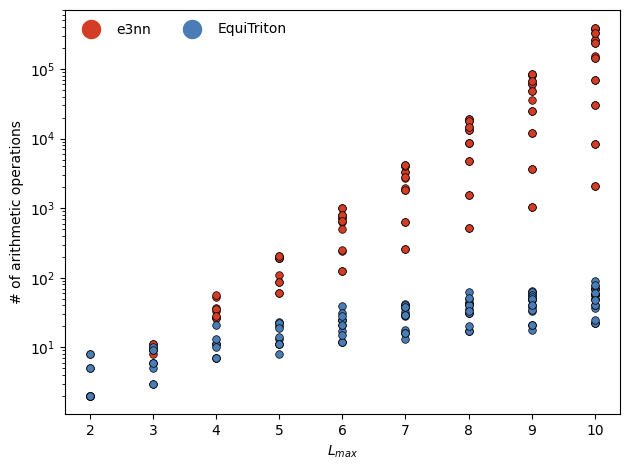

In [25]:
fig, ax = plt.subplots()

for n in range(2, 11):
    num_projections = 2 * n + 1
    x_points = np.ones(num_projections) * n
    e3nn_impl, direct_counts = count_operations_per_n(n)
    ax.scatter(x_points, e3nn_impl, label="e3nn", facecolor="#d33c25", edgecolor="k", s=30., lw=0.5)
    ax.scatter(x_points, direct_counts, label="EquiTriton", edgecolor="k", facecolor="#4a7cb6", s=30., lw=0.5,)
ax.set(yscale="log", xlabel="$L_{max}$", ylabel="# of arithmetic operations")

leg = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#d33c25", markersize=15., label="e3nn"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#4a7cb6", markersize=15., label="EquiTriton")
]
ax.legend(handles=leg, ncols=2, frameon=False)
fig.tight_layout()

In [26]:
fig.savefig("equitriton_algorithmic_scaling.png", dpi=150)

## Dumping expressions to JSON

Helps with implementation and just to have a nice record of them outside the notebook.

In [27]:
import json
import os
import string

In [28]:
def write_expressions_to_json(expr_set, n: int):
    os.makedirs("direct_sph_harm", exist_ok=True)
    write_dict = {}
    write_dict["fwd"] = [str(expr) for expr in expr_set["fwd"]]
    write_dict["bwd"] = {axis: str(expr) for axis, expr in expr_set["bwd"].items()}
    with open(f"direct_sph_harm/l_{n}.json", "w+") as write_file:
        json.dump(write_dict, write_file, indent=2)

In [29]:
for e, n in zip(
    [second_order_expressions, third_order_expressions, fourth_order_expressions, fifth_order_expressions, sixth_order_expressions, seventh_order_expressions, eighth_order_expressions, ninth_order_expressions, tenth_order_expressions], range(2, 11)
):
    write_expressions_to_json(e, n)

In [30]:
def collect_symbols(expr, agg_set):
    if len(expr.args) != 0 and not isinstance(expr, sympy.Pow):
        for arg in expr.args:
            collect_symbols(arg, agg_set)
    else:
        agg_set.add(expr)

In [38]:
def generate_fwd_implementation(exprs):
    variable_set = set()
    for expr in exprs:
        collect_symbols(expr, variable_set)
    mapping = {}
    const_counter = 0
    char_counter = 0
    for sym in variable_set:
        if isinstance(sym, (sympy.Float, sympy.Integer)):
            varname = f"CONST{const_counter:03}"
            const_counter += 1
        else:
            varname = string.ascii_uppercase[char_counter]
            char_counter += 1
        mapping[sym] = varname
    mapping = dict(sorted(mapping.items(), key=lambda x: x[1]))
    fmt_string = "# -------------------- variable and constant definitions\n"
    for sym, char in mapping.items():
        fmt_string += f"{char} = {sym}\n"
    # now generate the actual kernels
    fmt_string += "# -------------------- kernel implementations\n"
    term_counter = 0
    for index, kernel in enumerate(exprs):
        fmt_string += f"Y{index:02} = {kernel.subs(mapping)}\n"
    print(fmt_string)

In [50]:
generate_fwd_implementation(sixth_order_expressions["fwd"][5:])

SympifyError: SympifyError: <sympy.assumptions.ask.AssumptionKeys object at 0x7f50f3f02b90>